In [122]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [123]:
ratings_data = pd.read_csv('./data/ratings.csv')

In [124]:
ratings_data.columns

Index(['_id', 'movie_id', 'rating_val', 'user_id'], dtype='object')

In [ ]:
user_item_matrix = ratings_data.pivot_table(index='user_id', columns='movie_id', values='rating_val')

# Fill missing values with 0 (alternatively, NaN could be used for a more sophisticated approach)
user_item_matrix.fillna(0, inplace=True)

# Calculate item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)  # Transpose to get item-based similarity
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_similarity_df.shape

(5000, 5000)

In [ ]:
def predict_ratings(user_id, top_n=10):
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0].index
    predictions = {}
    for item in user_item_matrix.columns:
        if item not in rated_items:
            sim_scores = item_similarity_df[item][rated_items]
            user_rated_scores = user_ratings[rated_items]
            predicted_rating = np.dot(sim_scores, user_rated_scores) / sim_scores.sum() if sim_scores.sum() != 0 else 0
            predictions[item] = predicted_rating
    
    top_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return top_predictions


In [127]:
ratings_data.head()

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
1,5fc57c5d6758f6963451a172,the-social-network,10,deathproof
2,5fc57c5d6758f6963451a0a0,saw-iii,7,deathproof
3,5fc57c5d6758f6963451a0e0,the-girl-on-the-train-2016,8,deathproof
4,5fc57c5d6758f6963451a11d,yes-man,6,deathproof


In [128]:
user_id = "nathanrabin"
recommendations = predict_ratings(user_id)
for (x,y) in recommendations:
    print(f"{x} -- {y.round(2)}")

film:520339 -- 9.05
coca-cola-a-mini-marvel -- 7.0
go-go-cory-carson-chrissy-takes-the-wheel -- 7.0
the-exorsis -- 7.0
13th-day-of-christmas -- 7.0
ben-10-versus-the-universe-the-movie -- 7.0
cheese-in-the-trap -- 7.0
detective-conan-the-scarlet-bullet -- 7.0
dino-king-journey-to-fire-mountain -- 7.0
introducing-chucky-the-making-of-childs-play -- 7.0


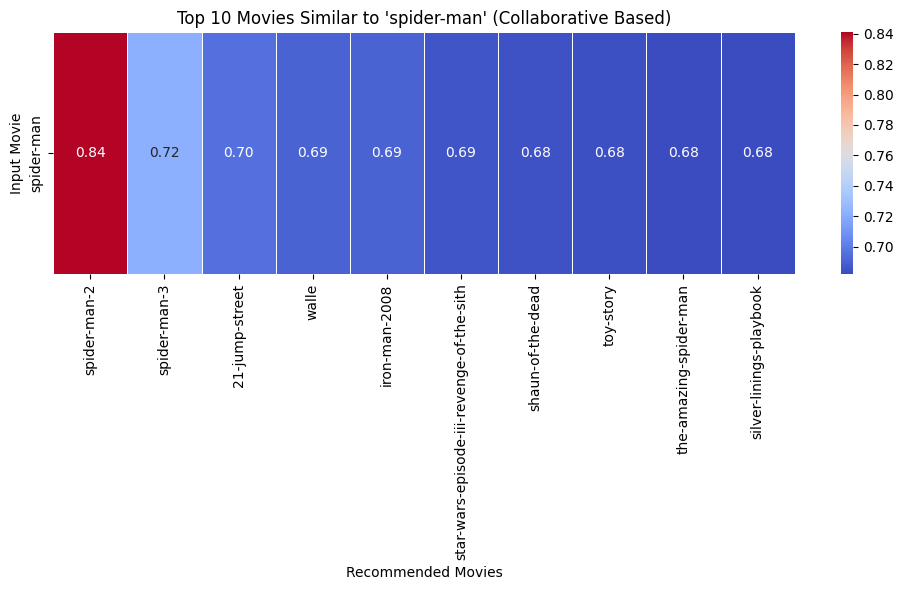

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
similarity_matrix = item_similarity_df
 
def recommend_movies_for_single(input_movie, similarity_matrix, top_n=10):
    if input_movie not in similarity_matrix.index:
        return []
 
    similarity_scores = similarity_matrix.loc[input_movie]
 
    similar_movies = similarity_scores.nlargest(top_n + 1).iloc[1:]
    return similar_movies
 
input_movie = "spider-man"
similar_movies = recommend_movies_for_single(input_movie, similarity_matrix)
 
heatmap_data = pd.DataFrame(similar_movies).T
heatmap_data.index = [input_movie]
 
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f"Top 10 Movies Similar to '{input_movie}' (Collaborative Based)")
plt.xlabel("Recommended Movies")
plt.ylabel("Input Movie")
plt.tight_layout()
plt.show()